## Problem Statement

In this notebook, we will pick a dataset with 6 independent variables and do principal component analysis on the independent variables. Using the PCA results, we will reduce the dimensionality of the data set. Finally we will construct simple linear regression models with the original independent variables and contrast it against a model with the new reduced set of variables constructed using PCA

### Data Description: 

The dataset has 7 variables, including the name of the car and its various attributes like horsepower, weight, region of origin, etc. Missing values in the data are marked by a series of question marks.

A detailed description of the variables is given below.

1. mpg: miles per gallon
2. cylinders: number of cylinders
3. displacement: engine displacement in cubic inches
4. horsepower: horsepower of the car
5. weight: weight of the car in pounds
6. acceleration: time taken, in seconds, to accelerate from O to 60 mph
7. model year: year of manufacture of the car (modulo 100)


## Import Libraries

In [ ]:
import numpy as np   
from sklearn.linear_model import LinearRegression
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.decomposition import PCA

### Load the dataset

In [ ]:
cData = pd.read_csv("/content/auto_mpg_dataset.csv")  
cData.shape

(398, 7)

### Displaying the first few rows of the dataset

In [ ]:
cData.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [ ]:
df = cData.copy()

### Data Preparation for modeling

In [ ]:
# independent variables
X = df.drop(["mpg"], axis=1)
# dependent variable
y = df["mpg"]

In [ ]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
XScaled.head()

,cylinders,displacement,horsepower,weight,acceleration,model year
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426


In [ ]:
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00251889  0.95311615  0.84340357  0.89827376 -0.50669259 -0.34962425]
 [ 0.95311615  1.00251889  0.89803457  0.93517383 -0.54505356 -0.37109656]
 [ 0.84340357  0.89803457  1.00251889  0.86461476 -0.68831918 -0.41477495]
 [ 0.89827376  0.93517383  0.86461476  1.00251889 -0.41850885 -0.30733654]
 [-0.50669259 -0.54505356 -0.68831918 -0.41850885  1.00251889  0.28886274]
 [-0.34962425 -0.37109656 -0.41477495 -0.30733654  0.28886274  1.00251889]]


## Fit the Model

In [ ]:
pca = PCA(n_components=6)
pca.fit(XScaled)

PCA(n_components=6)

#### The eigen Values

In [ ]:
print(pca.explained_variance_)

[4.26378678 0.84068225 0.67499578 0.13552589 0.06386533 0.03625731]


#### The eigen Vectors

In [ ]:
print(pca.components_)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]
 [-0.65709523 -0.18742114  0.62819714  0.33868744  0.15214558  0.02469974]
 [ 0.28804531 -0.00141408  0.60418441 -0.68887559  0.27061128  0.06487726]
 [-0.46420823  0.83717483 -0.10059817 -0.26829299  0.0367486   0.01405118]]


#### percentage of variation explained by each eigen Vector

In [ ]:
print(pca.explained_variance_ratio_)

[0.70884563 0.13976166 0.11221664 0.0225309  0.01061748 0.0060277 ]


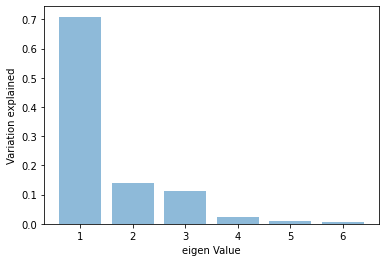

In [ ]:
plt.bar(list(range(1,7)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

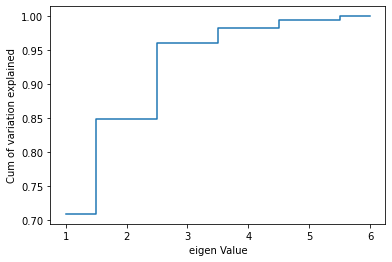

In [ ]:
plt.step(list(range(1,7)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

## Dimensionality Reduction


Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!

In [ ]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.45509041  0.46913807  0.46318283  0.44618821 -0.32466834 -0.23188446]
 [ 0.18276349  0.16077095  0.0139189   0.25676595  0.21039209  0.9112425 ]
 [ 0.17104591  0.13443134 -0.12440857  0.27156481  0.86752316 -0.33294164]]
[0.70884563 0.13976166 0.11221664]


In [ ]:
Xpca3

array([[ 2.58470158, -1.13503558, -0.09158558],
       [ 3.36172518, -1.03670689, -0.24694524],
       [ 2.95892839, -1.20779415, -0.47937758],
       ...,
       [-1.16393463,  0.71574676, -2.16248162],
       [-1.94324569,  1.32567228,  0.14526268],
       [-1.95553788,  1.41517409,  0.41668135]])

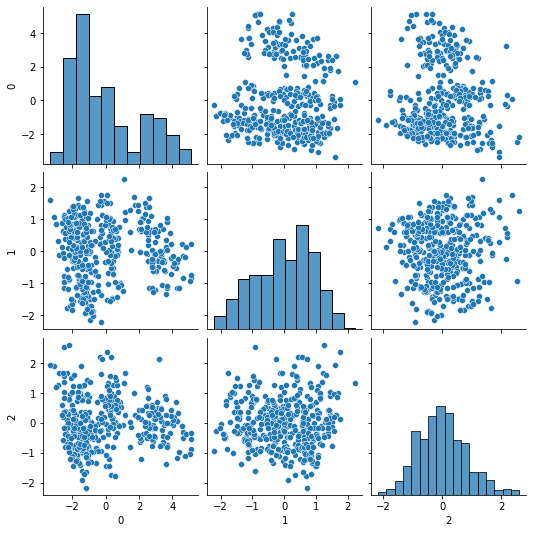

In [ ]:
sns.pairplot(pd.DataFrame(Xpca3))

## Fit Linear Model



Lets construct two linear models. The first with all the 6 independent variables and the second with only the 3 new variables constructed using PCA.

In [ ]:
regression_model = LinearRegression()
regression_model.fit(XScaled, y)
regression_model.score(XScaled, y)

0.8087079552406331

In [ ]:
regression_model_pca = LinearRegression()
regression_model_pca.fit(Xpca3, y)
regression_model_pca.score(Xpca3, y)

0.7799909620572006

Looks like by drop reducing dimensionality by 3, we only dropped around 3% in R^2! This is insample (on training data) and hence a drop in R^2 is expected. Still seems easy to justify the dropping of variables. An out of sample (on test data), with the 3 independent variables is likely to do better since that would be less of an over-fit. 